# Anaemia Classification

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [96]:
df = pd.read_csv("Anaemia.csv")
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


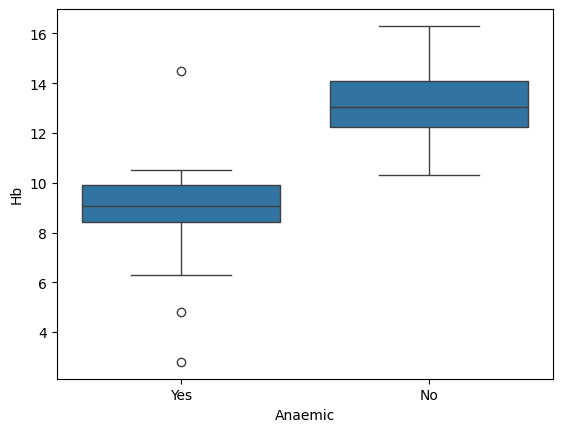

In [97]:
sns.boxplot(x="Anaemic",y="Hb",data=df)
plt.show()

In [98]:
df = df.drop(columns=['Number'])

In [99]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])

df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,2,43.2555,30.8421,25.9025,6.3,Yes
1,0,45.6033,28.1900,26.2067,13.5,No
2,1,45.0107,28.9677,26.0215,11.7,No
3,0,44.5398,28.9899,26.4703,13.5,No
4,3,43.2870,30.6972,26.0158,12.4,No


In [100]:
# Initialize the LabelEncoder
label_encoder_anaemic = LabelEncoder()

# Fit and transform the 'Anaemic' column
df['Anaemic'] = label_encoder_anaemic.fit_transform(df['Anaemic'])

df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,2,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,1,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,3,43.2870,30.6972,26.0158,12.4,0


In [101]:
# Separate features and target variable
X = df.drop(columns=['Anaemic'])
y = df['Anaemic']

In [120]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True) 

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.83      0.71      0.77         7

    accuracy                           0.91        32
   macro avg       0.88      0.84      0.86        32
weighted avg       0.90      0.91      0.90        32

Accuracy Score: 0.90625


In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)  

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression_model.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.93      0.95        32
weighted avg       0.97      0.97      0.97        32

Accuracy Score: 0.96875


In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Accuracy Score: 1.0


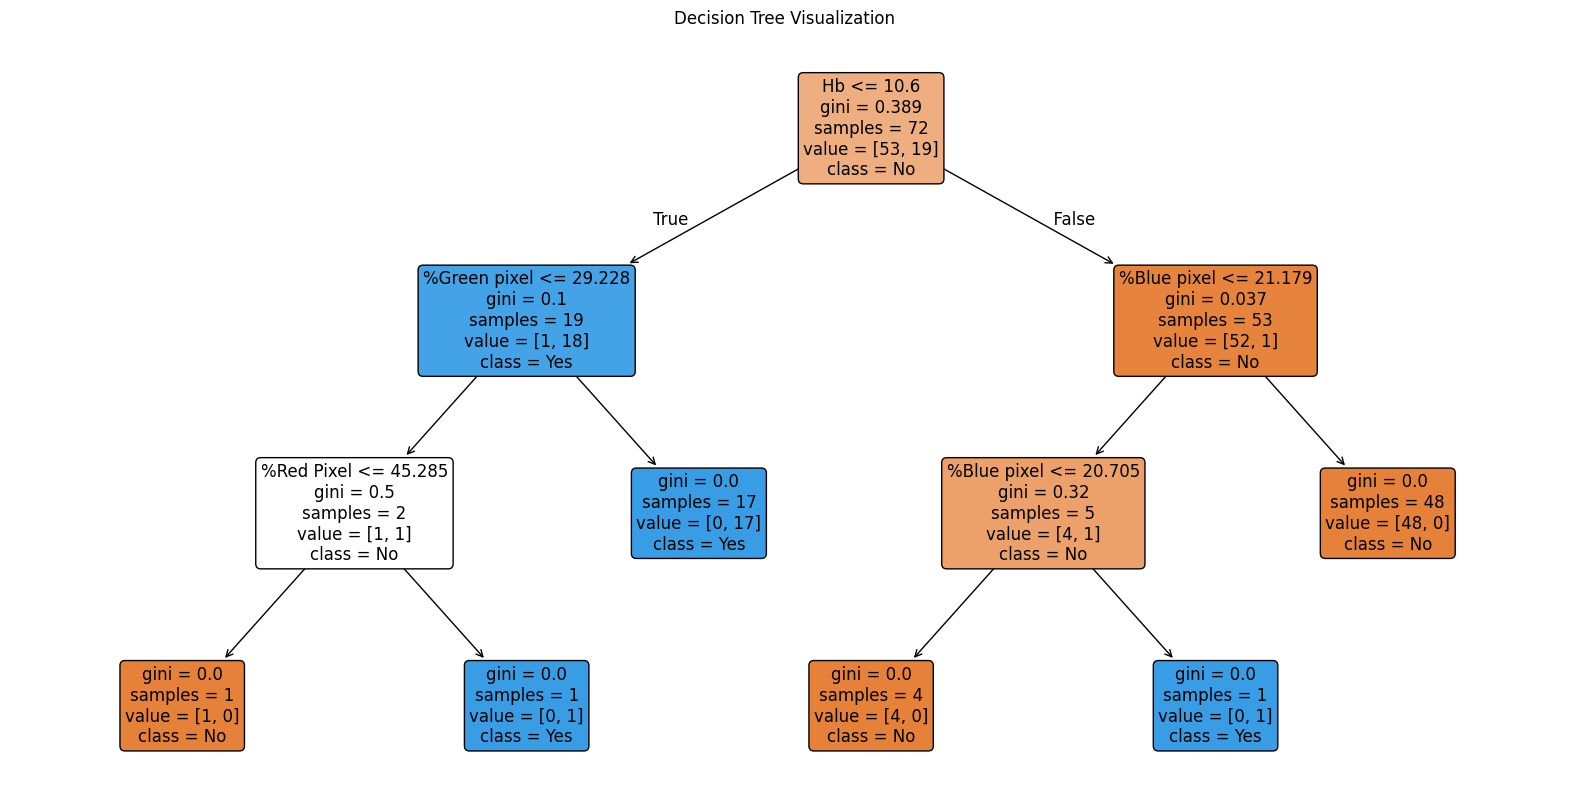

In [126]:
# Convert class names to strings
class_names = [str(cls) for cls in label_encoder_anaemic.classes_]

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    decision_tree_model,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Decision Tree Visualization')
plt.show()

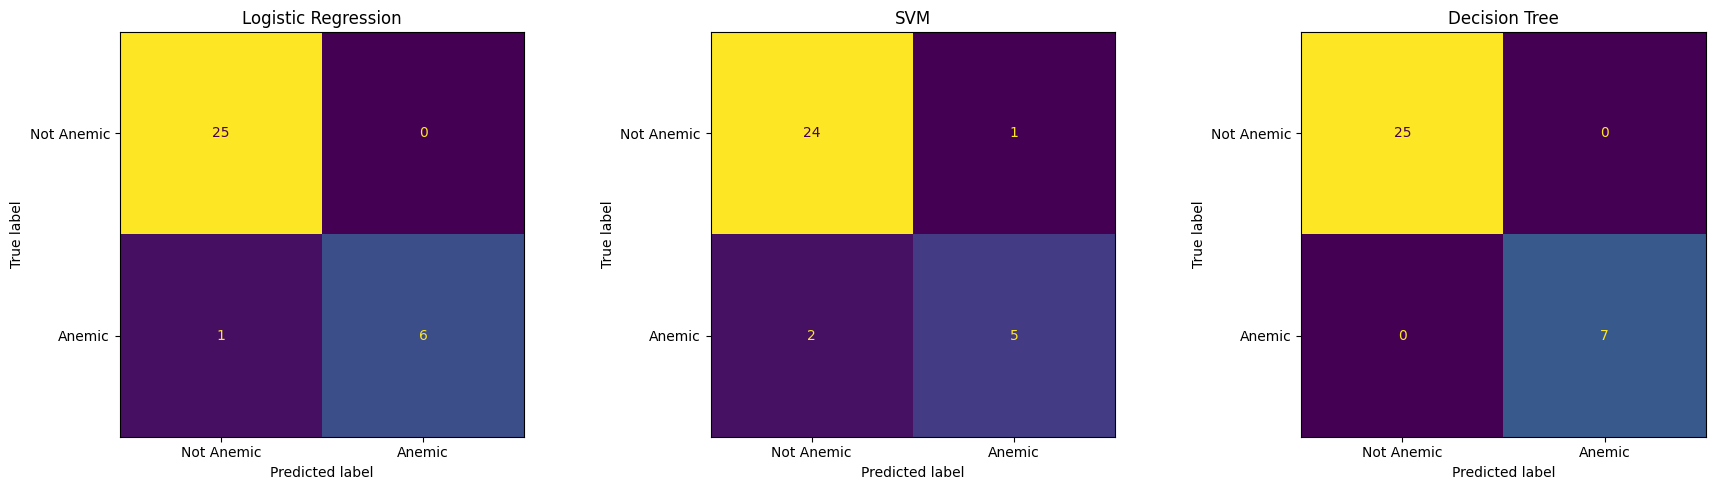

In [127]:
# Get the confusion matrices
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay(conf_matrix_lr, display_labels=['Not Anemic', 'Anemic']).plot(ax=axes[0], colorbar=False)
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay(conf_matrix_svm, display_labels=['Not Anemic', 'Anemic']).plot(ax=axes[1], colorbar=False)
axes[1].set_title('SVM')

ConfusionMatrixDisplay(conf_matrix_dt, display_labels=['Not Anemic', 'Anemic']).plot(ax=axes[2], colorbar=False)
axes[2].set_title('Decision Tree')

plt.tight_layout()
plt.show()

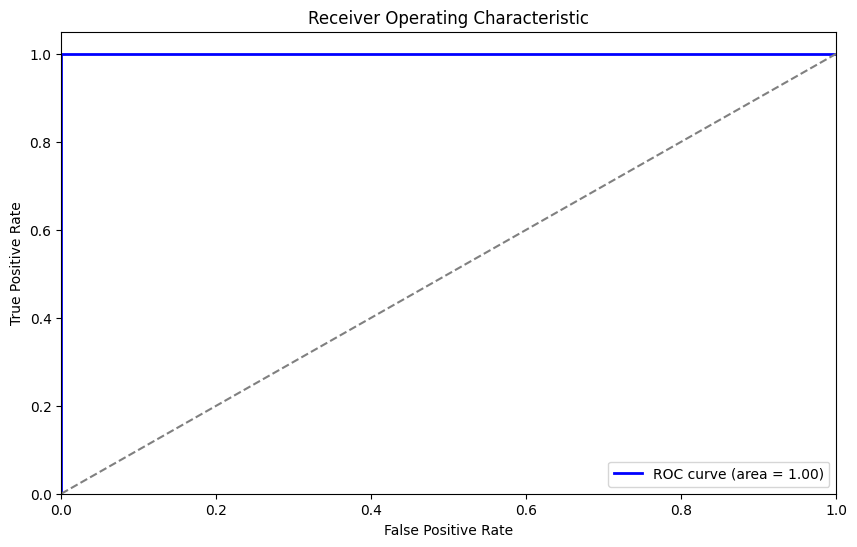

ROC AUC Score: 1.0


In [128]:
# Get the predicted probabilities
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC score
print("ROC AUC Score:", roc_auc)

In [129]:
# Calculate Youden's J statistic
j_scores = tpr - fpr
best_threshold_index = j_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print("Optimal Threshold:", best_threshold)


Optimal Threshold: 1.0


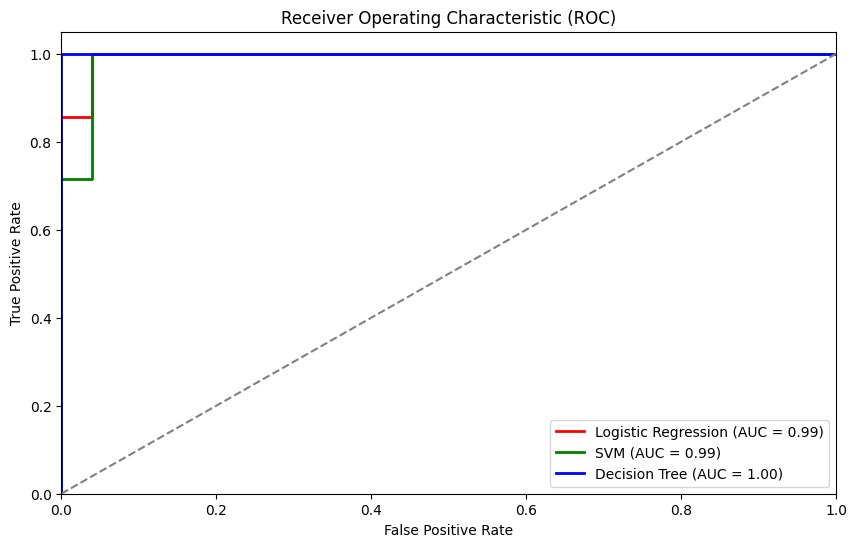

In [130]:
# Get the predicted probabilities
y_prob_lr = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_svm = svm_classifier.predict_proba(X_test)[:, 1]
y_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Compute AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()